In [16]:
!pip install openpyxl

Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


## Import libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [15]:
data = pd.read_excel("../../data/train.xlsx")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

## Distribution of `battery_power`

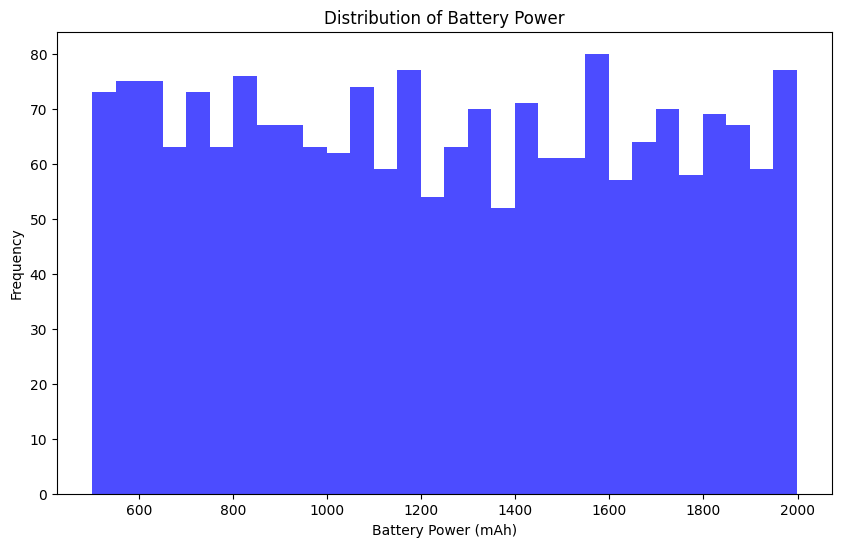

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['battery_power'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.show()


## Correlation Heatmap

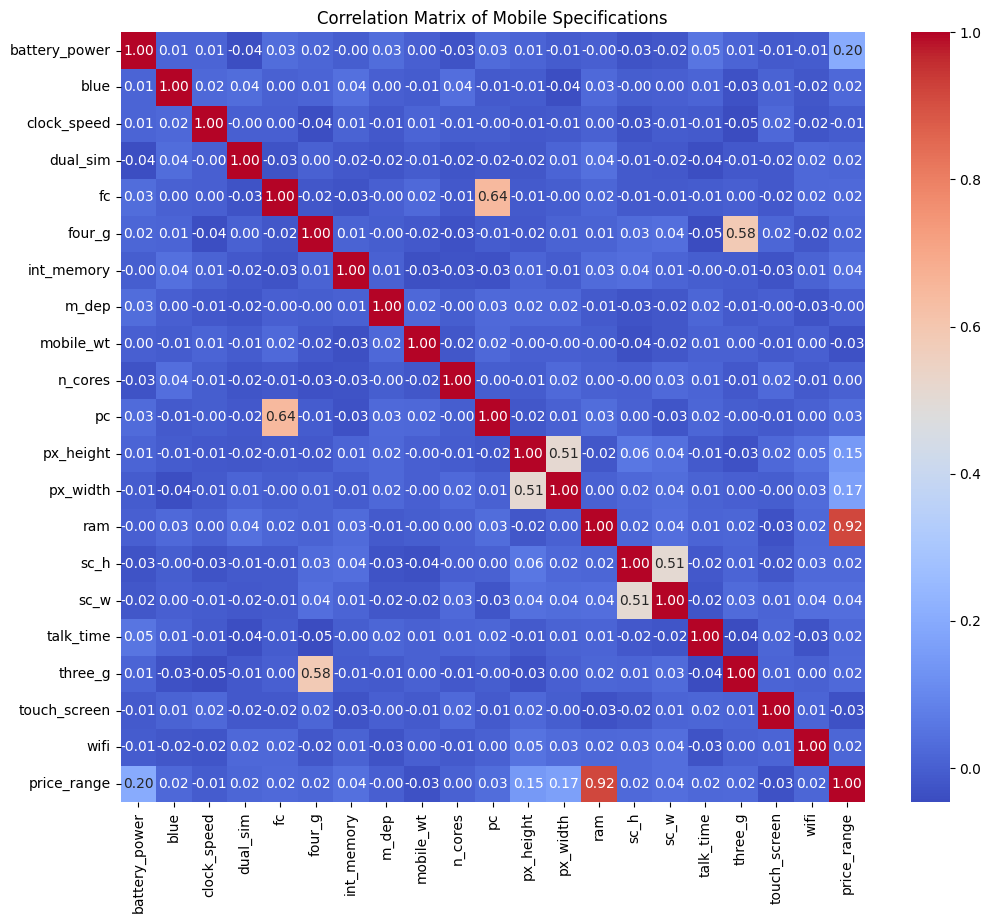

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mobile Specifications')
plt.show()


## Code for Box Plot Comparing ram Across dual_sim Categories

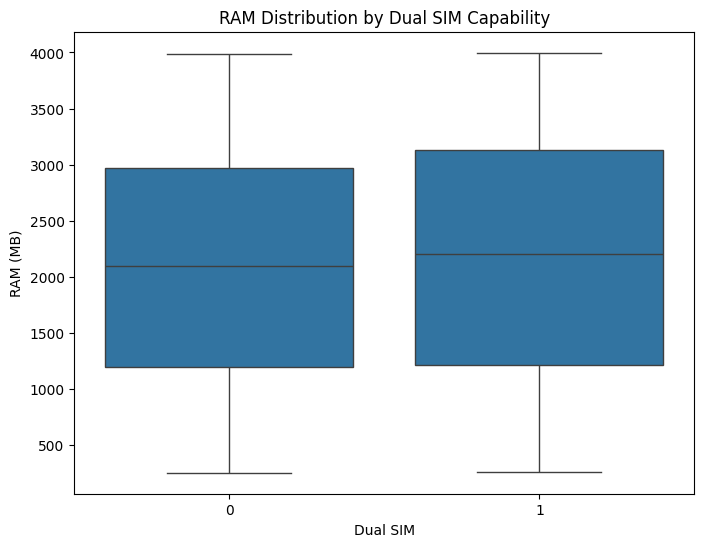

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='dual_sim', y='ram', data=data)
plt.title('RAM Distribution by Dual SIM Capability')
plt.xlabel('Dual SIM')
plt.ylabel('RAM (MB)')
plt.show()


## Perform feature importance analysis
> **Note:** *Random Forest* model is used because it handles both numerical and categorical data and provides a straightforward method for feature importance evaluation.

### Import Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Prepare the Data

In [ ]:
# Features and Target
X = data.drop('price_range', axis=1)  # all columns except the target
y = data['price_range']  # target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Random Forest Model

In [ ]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Feature Importance

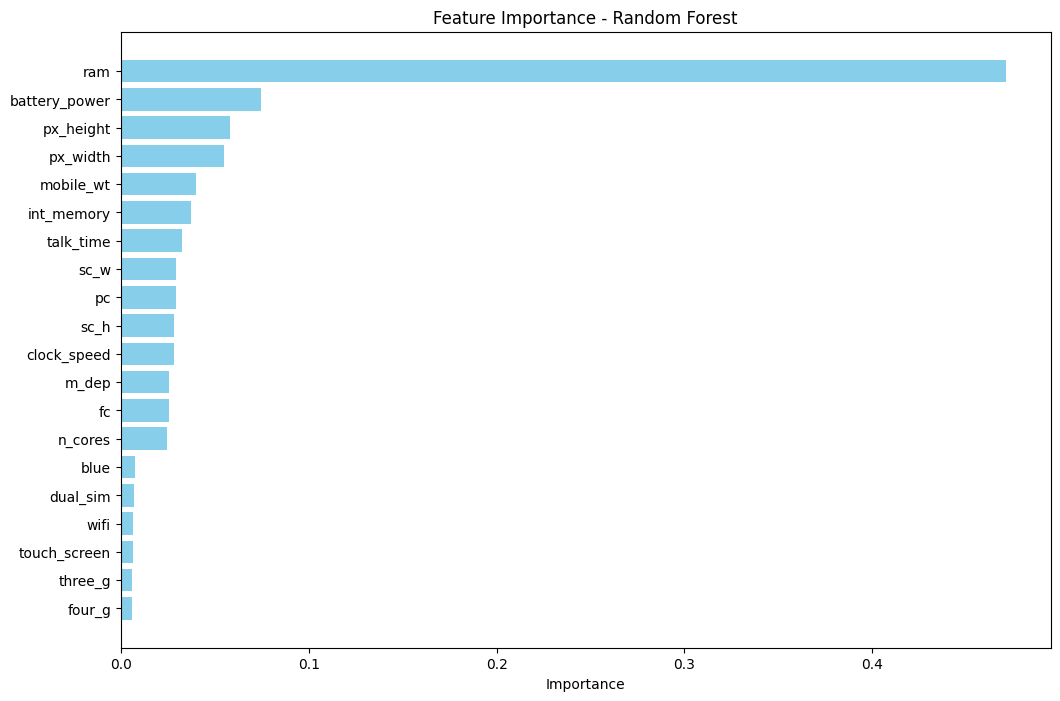

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Organize them into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

## Conclusin
- The features `ram` and `battery_power` are the most crucial to determine the target `price_range`